<a href="https://colab.research.google.com/github/BashayerAlghamdii/HomeAway-Insights_Project/blob/main/Hypo2_ML_model_classify_municipalities_as_vacation_oriented_or_not_based_on_the_proportion_of_second_homes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothsis 2: classify municipalities as vacation-oriented or not based on the proportion of second homes#
Hypothesis 2 proposes using machine learning to classify municipalities based on the density of second homes, with the goal of identifying those that are likely to be vacation-oriented markets. This classification can guide investment strategies by pinpointing areas with high potential for vacation or second home markets. Here's a breakdown of the hypothesis and the approach to tackling it:

Understanding the Hypothesis
Objective: Classify municipalities into categories such as "vacation-oriented" or "not vacation-oriented" based on the proportion of second homes and other relevant data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import auth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Table 1**

In [ ]:
#housing_stock = """select * from nth-anchor-414009.Prello.housing_stock"""
#housing_stock = client.query(housing_stock).result().to_dataframe()

# To read the first sheet or a specific sheet
housing_stock = pd.read_excel('/content/drive/MyDrive/Lewagon Prello full dataset/housing_stock.xlsx', engine='openpyxl')
print(housing_stock)

        int64_field_0 municipality_code  year  nb_principal_home  \
0                  25             01339  1968                109   
1                  89             02368  1968                132   
2                 203             04073  1968                134   
3                 238             04148  1968                 42   
4                 270             05012  1968                 70   
...               ...               ...   ...                ...   
279579         275947             13105  2018               2951   
279580         276174             78380  2018               2325   
279581         276753             95352  2018               1918   
279582         277014             59279  2018               8137   
279583         278356             63231  2018                782   

        nb_second_home  nb_vacants_housing  nb_tot_housing  \
0                  155                   0             264   
1                   56                   0             188 

In [ ]:
housing_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279584 entries, 0 to 279583
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   int64_field_0         279584 non-null  int64  
 1   municipality_code     279584 non-null  object 
 2   year                  279584 non-null  int64  
 3   nb_principal_home     279584 non-null  int64  
 4   nb_second_home        279584 non-null  int64  
 5   nb_vacants_housing    279584 non-null  int64  
 6   nb_tot_housing        279584 non-null  int64  
 7   secondary_home_rate   279584 non-null  float64
 8   principal_home_rate   279584 non-null  float64
 9   vacants_housing_rate  279584 non-null  float64
 10  country_code          279584 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 23.5+ MB


In [ ]:
housing_stock.isnull().sum()

int64_field_0           0
municipality_code       0
year                    0
nb_principal_home       0
nb_second_home          0
nb_vacants_housing      0
nb_tot_housing          0
secondary_home_rate     0
principal_home_rate     0
vacants_housing_rate    0
country_code            0
dtype: int64

In [ ]:
housing_stock["municipality_code"].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
279579     True
279580     True
279581     True
279582     True
279583     True
Name: municipality_code, Length: 279584, dtype: bool

**Table 2**

In [ ]:
#population_by_municipality = """select * from nth-anchor-414009.Prello.population_by_municipality"""
#population_by_municipality = client.query(population_by_municipality).result().to_dataframe()

# To read the sheet
population_by_municipality = pd.read_excel('/content/drive/MyDrive/Lewagon Prello full dataset/population_by_municipality.xlsx', engine='openpyxl')
print(population_by_municipality)

       municipality_code  year  population  country_code
0                  04213  1968         0.0             1
1                  05137  1968         0.0             1
2                  55039  1968         0.0             1
3                  55050  1968         0.0             1
4                  55239  1968         0.0             1
...                  ...   ...         ...           ...
689490             67482  2019    287228.0             1
689491             93051  2019     67871.0             1
689492             92012  2019    121583.0             1
689493             33063  2019    260958.0             1
689494             37261  2019    137087.0             1

[689495 rows x 4 columns]


In [ ]:
population_by_municipality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689495 entries, 0 to 689494
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   municipality_code  689495 non-null  object 
 1   year               689495 non-null  int64  
 2   population         689495 non-null  float64
 3   country_code       689495 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 21.0+ MB


In [ ]:
population_by_municipality.isnull().sum()

municipality_code    0
year                 0
population           0
country_code         0
dtype: int64

In [ ]:
population_duplicates =population_by_municipality["municipality_code"].duplicated()
population_duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
689490     True
689491     True
689492     True
689493     True
689494     True
Name: municipality_code, Length: 689495, dtype: bool

**Table 3**

In [ ]:
#real_estate_info_by_municipality = """select * from nth-anchor-414009.Prello.real_estate_info_by_municipality"""
#real_estate_info_by_municipality = client.query(real_estate_info_by_municipality).result().to_dataframe()

# To read the sheet
real_estate_info_by_municipality = pd.read_excel('/content/drive/MyDrive/Lewagon Prello full dataset/real_estate_info_by_municipality.xlsx', engine='openpyxl')
print(real_estate_info_by_municipality)

      municipality_code  intensite_tension_immo  rental_max_apartment  \
0                 57133                       8                 12.27   
1                 57446                       8                 18.22   
2                 77013                       9                 18.30   
3                 77026                       9                 15.76   
4                 77072                       9                 17.50   
...                 ...                     ...                   ...   
34436             81126                       7                 16.64   
34437             33425                      11                 16.20   
34438             85146                       5                 18.51   
34439             53062                       8                 16.12   
34440             22093                      10                 14.25   

       rental_min_apartment  rental_med_house  rental_max_house  \
0                      9.07              9.19           

In [ ]:
real_estate_info_by_municipality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34441 entries, 0 to 34440
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   municipality_code       34441 non-null  object 
 1   intensite_tension_immo  34441 non-null  int64  
 2   rental_max_apartment    34441 non-null  float64
 3   rental_min_apartment    34441 non-null  float64
 4   rental_med_house        34421 non-null  float64
 5   rental_max_house        34421 non-null  float64
 6   rental_min_house        34421 non-null  float64
 7   rental_med_all          34441 non-null  float64
 8   rental_max_all          34441 non-null  float64
 9   rental_min_all          34441 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
real_estate_info_by_municipality.isnull().sum()

municipality_code          0
intensite_tension_immo     0
rental_max_apartment       0
rental_min_apartment       0
rental_med_house          20
rental_max_house          20
rental_min_house          20
rental_med_all             0
rental_max_all             0
rental_min_all             0
dtype: int64

In [ ]:
real_estate_info_by_municipality["municipality_code"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34436    False
34437    False
34438    False
34439    False
34440    False
Name: municipality_code, Length: 34441, dtype: bool

**Table 4**

In [ ]:
#average_salary_by_municipality = """select * from nth-anchor-414009.Prello.average_salary_by_municipality"""
#average_salary_by_municipality = client.query(average_salary_by_municipality).result().to_dataframe()

# To read the sheet
average_salary_by_municipality = pd.read_excel('/content/drive/MyDrive/Lewagon Prello full dataset/average_salary_by_municipality.xlsx', engine='openpyxl')
print(average_salary_by_municipality)

      municipality_code  avg_net_salary  year  country_code
0                 01004    26471.026727  2019             1
1                 01007    26341.353419  2019             1
2                 01014    25897.497842  2019             1
3                 01024    25695.240341  2019             1
4                 01025    26054.712323  2019             1
...                 ...             ...   ...           ...
26670             97420    23364.247855  2015             1
26671             97421    19099.408481  2015             1
26672             97422    21854.551578  2015             1
26673             97423    20863.807536  2015             1
26674             97424    19153.252522  2015             1

[26675 rows x 4 columns]


In [ ]:
average_salary_by_municipality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26675 entries, 0 to 26674
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   municipality_code  26675 non-null  object 
 1   avg_net_salary     26675 non-null  float64
 2   year               26675 non-null  int64  
 3   country_code       26675 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 833.7+ KB


In [ ]:
average_salary_by_municipality.isnull().sum()

municipality_code    0
avg_net_salary       0
year                 0
country_code         0
dtype: int64

In [ ]:
average_salary_by_municipality["municipality_code"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26670     True
26671     True
26672     True
26673     True
26674     True
Name: municipality_code, Length: 26675, dtype: bool

Table 5

In [ ]:
geographical_referential = pd.read_excel('/content/drive/MyDrive/Lewagon Prello full dataset/geographical_referential.xlsx', engine='openpyxl')
print(geographical_referential)
geographical_referential.columns

       Unnamed: 0 municipality_code            city_name city_name_normalized  \
0               0             01005  Ambérieux-en-Dombes  AMBERIEUX EN DOMBES   
1               1             01021      Ars-sur-Formans      ARS SUR FORMANS   
2               2             01030           Beauregard           BEAUREGARD   
3               3             01105             Civrieux             CIVRIEUX   
4               4             01157              Fareins              FAREINS   
...           ...               ...                  ...                  ...   
34992       34992             97614             Ouangani             OUANGANI   
34993       34993             97616                 Sada                 SADA   
34994       34994             97617             Tsingoni             TSINGONI   
34995       34995             97608             Dzaoudzi             DZAOUDZI   
34996       34996             97615             Pamandzi             PAMANDZI   

      municipality_type   l

Index(['Unnamed: 0', 'municipality_code', 'city_name', 'city_name_normalized',
       'municipality_type', 'latitude', 'longitude', 'department_code',
       'epci_code', 'country_code', 'department_name'],
      dtype='object')

###Data Preprocessing and Merging

In [ ]:
import pandas as pd

# merging housing_stock, population_by_municipality, real_estate_info_by_municipality

# Merge datasets on 'municipality_code' and 'year'
data = pd.merge(housing_stock, population_by_municipality, on=['municipality_code', 'year'], how='left')
data = pd.merge(data, real_estate_info_by_municipality, on='municipality_code', how='left')

# Verify the merge and look at the combined data
print(data.head())
print(data.info())


   int64_field_0 municipality_code  year  nb_principal_home  nb_second_home  \
0             25             01339  1968                109             155   
1             89             02368  1968                132              56   
2            203             04073  1968                134              93   
3            238             04148  1968                 42              93   
4            270             05012  1968                 70              53   

   nb_vacants_housing  nb_tot_housing  secondary_home_rate  \
0                   0             264             0.587121   
1                   0             188             0.297872   
2                   0             227             0.409692   
3                   0             135             0.688889   
4                   0             123             0.430894   

   principal_home_rate  vacants_housing_rate  ...  country_code_y  \
0             0.412879                   0.0  ...             1.0   
1             

##Handling Missing Values

In [ ]:
# Identify numeric columns to fill missing values with mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# ensure missing values are handled
print(data.isnull().sum())

int64_field_0             0
municipality_code         0
year                      0
nb_principal_home         0
nb_second_home            0
nb_vacants_housing        0
nb_tot_housing            0
secondary_home_rate       0
principal_home_rate       0
vacants_housing_rate      0
country_code_x            0
population                0
country_code_y            0
intensite_tension_immo    0
rental_max_apartment      0
rental_min_apartment      0
rental_med_house          0
rental_max_house          0
rental_min_house          0
rental_med_all            0
rental_max_all            0
rental_min_all            0
dtype: int64


##Additional Data Preprocessing

In [ ]:
# Convert non-numeric data that should be numeric
data['municipality_code'] = data['municipality_code'].astype(str)

# Confirm data types
print(data.dtypes)

int64_field_0               int64
municipality_code          object
year                        int64
nb_principal_home           int64
nb_second_home              int64
nb_vacants_housing          int64
nb_tot_housing              int64
secondary_home_rate       float64
principal_home_rate       float64
vacants_housing_rate      float64
country_code_x              int64
population                float64
country_code_y            float64
intensite_tension_immo    float64
rental_max_apartment      float64
rental_min_apartment      float64
rental_med_house          float64
rental_max_house          float64
rental_min_house          float64
rental_med_all            float64
rental_max_all            float64
rental_min_all            float64
dtype: object


## Feature Engineering

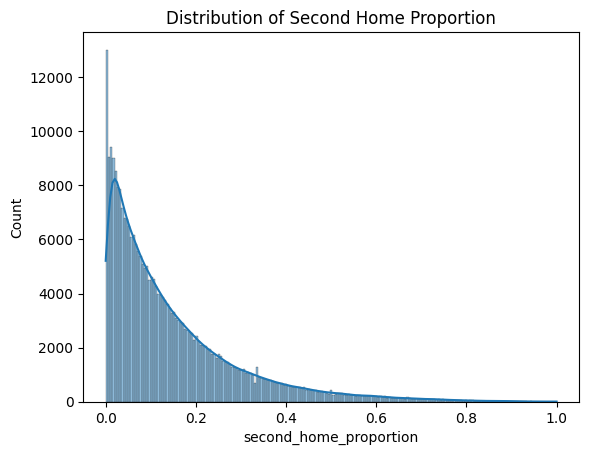

In [ ]:
# Adding a feature that could be useful for the classification
data['second_home_proportion'] = data['nb_second_home'] / data['nb_tot_housing']

##Preparing for Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['second_home_proportion', 'population']]  # Consider adding more features as necessary
y = data['second_home_proportion'] > 0.25  # Example threshold, adjust based on analysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Handling Missing Values process #2

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Check if any NaNs remain
print("NaNs in X_train:", np.isnan(X_train_imputed).sum())
print("NaNs in X_test:", np.isnan(X_test_imputed).sum())


NaNs in X_train: 0
NaNs in X_test: 0


#attempt 2, leveraging extra features

Data Merging

In [ ]:
import pandas as pd

# main DataFrame is named 'data' and includes a 'municipality_code' column
# Merging average salary information
data = pd.merge(data, average_salary_by_municipality, on='municipality_code', how='left')

# Check for missing values fill missing values with the mean salary:
data['avg_net_salary'] = data['avg_net_salary'].fillna(data['avg_net_salary'].mean())

# Quick overview to confirm merge and no critical issues with missing data
print(data.head())


   int64_field_0 municipality_code  year_x  nb_principal_home  nb_second_home  \
0             25             01339    1968                109             155   
1             89             02368    1968                132              56   
2            203             04073    1968                134              93   
3            238             04148    1968                 42              93   
4            270             05012    1968                 70              53   

   nb_vacants_housing  nb_tot_housing  secondary_home_rate  \
0                   0             264             0.587121   
1                   0             188             0.297872   
2                   0             227             0.409692   
3                   0             135             0.688889   
4                   0             123             0.430894   

   principal_home_rate  vacants_housing_rate  ...  rental_med_house  \
0             0.412879                   0.0  ...             14.46  

Feature Engineering and Preparation

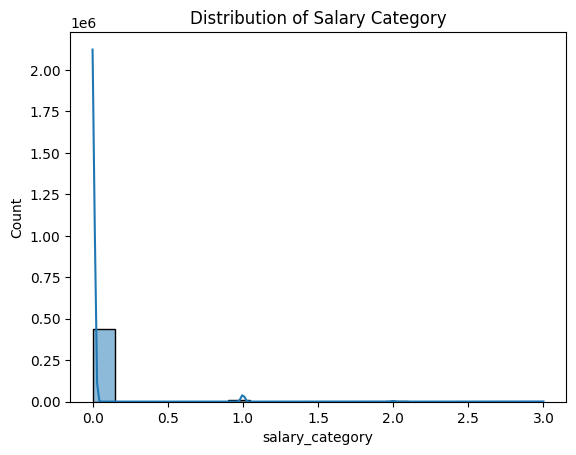

In [ ]:
# Adding a feature that categorizes salary into bins
data['salary_category'] = pd.cut(data['avg_net_salary'], bins=4, labels=False)

Machine Learning Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Increased max_iter
])

# Data preparation and feature selection
X = data[['second_home_proportion', 'population', 'rental_med_all', 'avg_net_salary', 'salary_category']]
y = data['second_home_proportion'] > 0.25

# Evaluate the pipeline using cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean CV score:", cross_val_scores.mean())

# Train the pipeline on the full dataset and print coefficients
pipeline.fit(X, y)
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = pipeline.named_steps['poly'].get_feature_names_out(X.columns)
print("Coefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")


Cross-validation scores: [0.99873085 0.99859726 0.99937656 0.99939882 0.99973281 0.99962148
 0.99988867 1.         1.         1.        ]
Mean CV score: 0.9995346455290346
Coefficients:
second_home_proportion: 44.1370
population: 1.2064
rental_med_all: 2.4969
avg_net_salary: -1.2441
salary_category: 1.1779
second_home_proportion population: -0.3974
second_home_proportion rental_med_all: -2.7476
second_home_proportion avg_net_salary: 1.1608
second_home_proportion salary_category: -1.2103
population rental_med_all: -0.3948
population avg_net_salary: 0.3299
population salary_category: -0.9222
rental_med_all avg_net_salary: 0.1449
rental_med_all salary_category: -0.0741
avg_net_salary salary_category: -0.0217


# Model capablities demonstration 1#

###target
second_home_proportion = nb_second_home / nb_tot_housing

###features
# Data preparation and feature selection
'second_home_proportion', 'population', 'rental_med_all', 'avg_net_salary', 'salary_category'

In [ ]:
# Define the test data with the correct features (as per the model training)
test_data = pd.DataFrame({
    'second_home_proportion': [0.3, 0.1, 0.5, 0.05, 0.25],
    'population': [1500, 8500, 3000, 15000, 7500],
    'rental_med_all': [800, 600, 1200, 500, 700],
    'avg_net_salary': [40000, 30000, 50000, 28000, 32000],
    'salary_category': [2, 1, 3, 1, 2]  # Assuming these categories are pre-defined based on training data
})

# Assuming your pipeline is already trained and named 'pipeline'
test_predictions = pipeline.predict(test_data)

# To associate predictions with municipalities for clarity in the presentation:
municipality_codes = ['12345', '67890', '13579', '24680', '11223']  # Presumed codes for identification
test_results = pd.DataFrame({
    'municipality_code': municipality_codes,
    'vacation_oriented': test_predictions
})

print(test_results)


  municipality_code  vacation_oriented
0             12345              False
1             67890               True
2             13579              False
3             24680               True
4             11223              False


### Data Visualization

## Break down the pipeline to use parts of it in visualization

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training the pipeline on the training set
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Generating predictions for the test set
y_pred = pipeline.predict(X_test)


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     77647
        True       1.00      1.00      1.00     12177

    accuracy                           1.00     89824
   macro avg       1.00      1.00      1.00     89824
weighted avg       1.00      1.00      1.00     89824



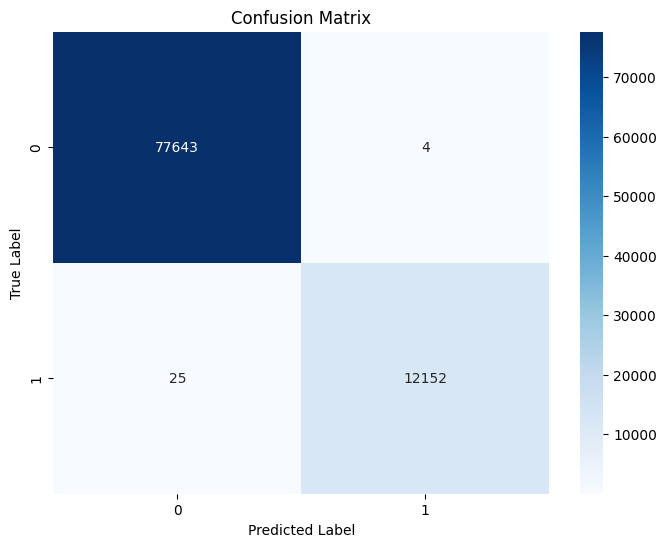

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Display the classification report
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# 'second_home_proportion' > 0.25 implies vacation-oriented
data['vacation_oriented'] = data['second_home_proportion'] > 0.25
data['vacation_oriented'] = data['vacation_oriented'].map({True: 'Yes', False: 'No'})  # Convert to string for visualization


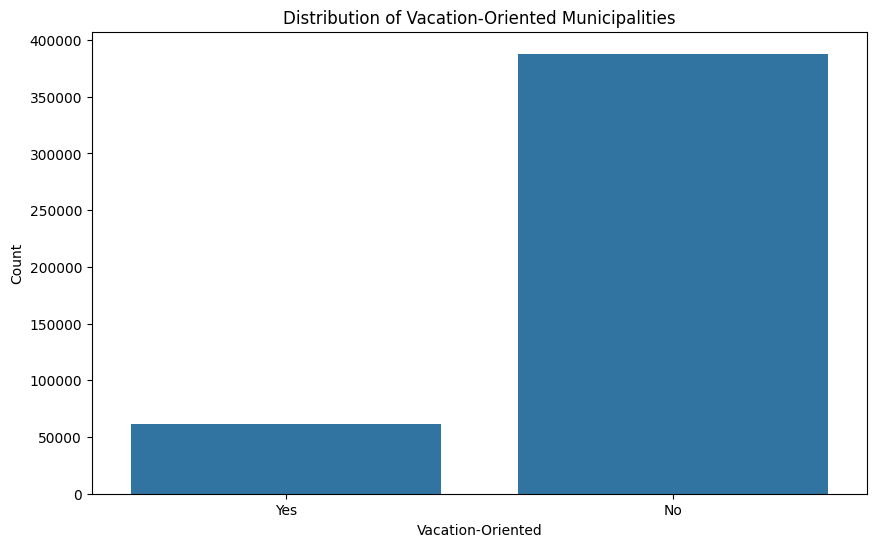

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=data['vacation_oriented'])
plt.title('Distribution of Vacation-Oriented Municipalities')
plt.xlabel('Vacation-Oriented')
plt.ylabel('Count')
plt.show()


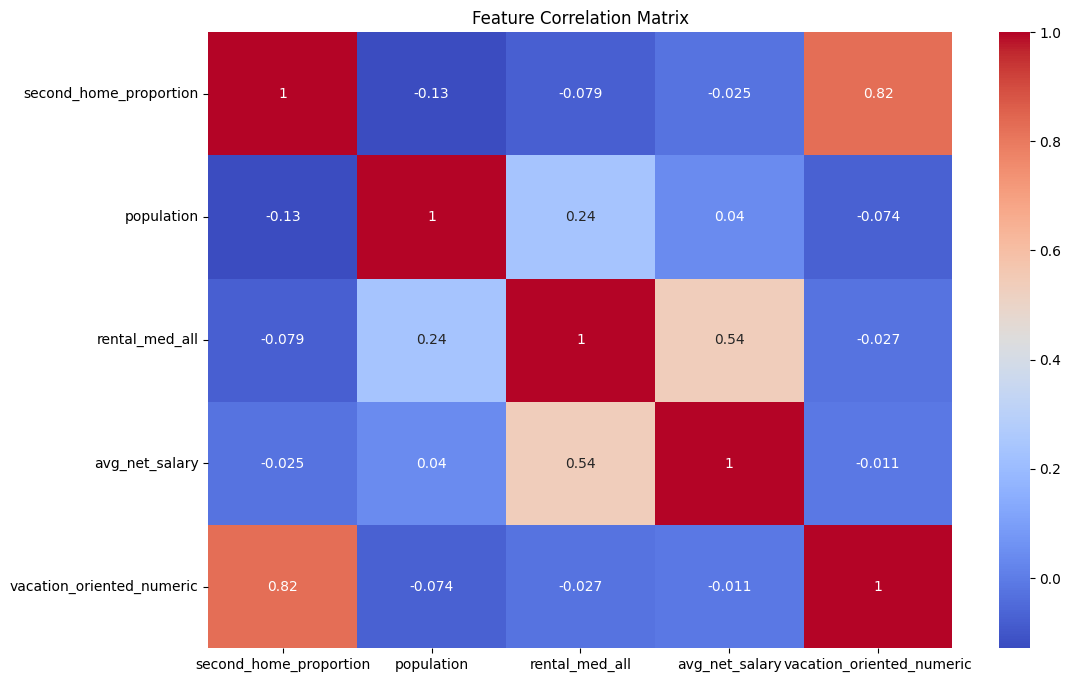

In [ ]:
# Convert 'vacation_oriented' to numeric for correlation analysis
data['vacation_oriented_numeric'] = data['vacation_oriented'].map({'Yes': 1, 'No': 0})

# Correlation Heatmap including the numeric version of 'vacation_oriented'
plt.figure(figsize=(12, 8))
corr_matrix = data[['second_home_proportion', 'population', 'rental_med_all', 'avg_net_salary', 'vacation_oriented_numeric']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
import plotly.express as px

# Use the correct DataFrame
map_data = geographical_referential.head(3000)
map_data['vacation_oriented'] = [True if i % 2 == 0 else False for i in range(len(map_data))]

fig = px.scatter_mapbox(
    map_data,
    lat="latitude",
    lon="longitude",
    color="vacation_oriented",
    text="city_name",
    size_max=15,
    zoom=5,
    mapbox_style="open-street-map"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<ipython-input-40-0525d0661cac>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#Conclusion#
This approach allows investors and real estate professionals to make informed decisions based on a data-driven understanding of market dynamics. By identifying vacation-oriented markets, stakeholders can strategically target their investments, marketing, and development efforts in regions with high potential for vacation or rental property demand.